[Open in Colab](https://colab.research.google.com/github/WoolierBrooks/DementiaDetect-Speech/blob/main/scripts/ml_algorithms/00_Complete_nb.ipynb)

Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importar o dataset

In [2]:
dataset = pd.read_csv("dataframe.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X, X.shape)
print(y, y.shape)

[[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...            nan
             nan            nan]
 [ 3.0517578e-05 -6.1035156e-05  9.1552734e-05 ...            nan
             nan            nan]
 [-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...            nan
             nan            nan]
 ...
 [-3.0517578e-05  9.1552734e-05  0.0000000e+00 ...            nan
             nan            nan]
 [ 9.1552734e-05  6.1035156e-05 -6.1035156e-05 ...            nan
             nan            nan]
 [-1.5258789e-04  0.0000000e+00 -9.1552734e-05 ...            nan
             nan            nan]] (549, 4296)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

Completando dados faltantes

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X)
X = imputer.transform(X)
print(X)

[[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 3.0517578e-05 -6.1035156e-05  9.1552734e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [-3.0517578e-05  9.1552734e-05  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 9.1552734e-05  6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-1.5258789e-04  0.0000000e+00 -9.1552734e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


Dividir o dataset em treino e teste

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train, X_train.shape)

[[-6.1035156e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 9.1552734e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-1.5258789e-04  1.2207031e-04  3.6621094e-04 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 6.1035156e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-6.1035156e-05  3.0517578e-05 -9.1552734e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]] (439, 4296)


In [5]:
print(X_test, X_test.shape)

[[-3.0517578e-05 -6.1035156e-05  6.1035156e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-3.6621094e-04 -3.0517578e-05  1.2207031e-04 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 1.8310547e-04  1.5258789e-04 -1.2207031e-04 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 3.0517578e-05 -9.1552734e-05  6.1035156e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-3.0517578e-04  1.5258789e-04 -1.5258789e-04 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]] (110, 4296)


In [6]:
print(y_train, y_train.shape)

[1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1
 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0
 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0] (439,)


In [7]:
print(y_test, y_test.shape)

[0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1
 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0] (110,)


Escalonamento de características

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.03775738  0.02300947 -0.04940856 ...  0.          0.
   0.        ]
 [ 0.16943624  0.06373993  0.12205672 ...  0.          0.
   0.        ]
 [-0.16207355  0.18593132  1.06511579 ...  0.          0.
   0.        ]
 ...
 [ 0.12799751 -0.017721    0.03632408 ...  0.          0.
   0.        ]
 [-0.03775738  0.06373993 -0.22087384 ...  0.          0.
   0.        ]
 [ 0.00368135 -0.017721    0.03632408 ...  0.          0.
   0.        ]]
[[ 0.00368135 -0.05845146  0.20778936 ...  0.          0.
   0.        ]
 [-0.45214461 -0.017721    0.37925464 ...  0.          0.
   0.        ]
 [ 0.29375241  0.22666179 -0.30660648 ...  0.          0.
   0.        ]
 ...
 [ 0.08655879 -0.09918193  0.20778936 ...  0.          0.
   0.        ]
 [-0.36926716  0.22666179 -0.39233913 ...  0.          0.
   0.        ]
 [ 0.04512007  0.06373993 -0.04940856 ...  0.          0.
   0.        ]]


Testando KNeighborsTimeSeriesClassifier

In [11]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Treinar o modelo
model = KNeighborsTimeSeriesClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Exibir os resultados
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Testando LearningShapelets

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Correct classification rate: 0.5154826958105647


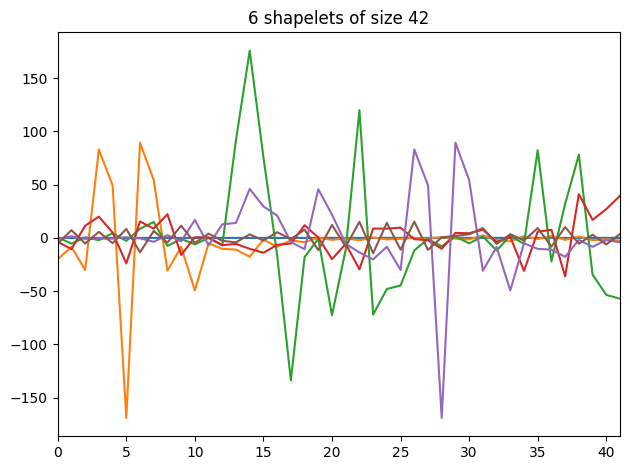

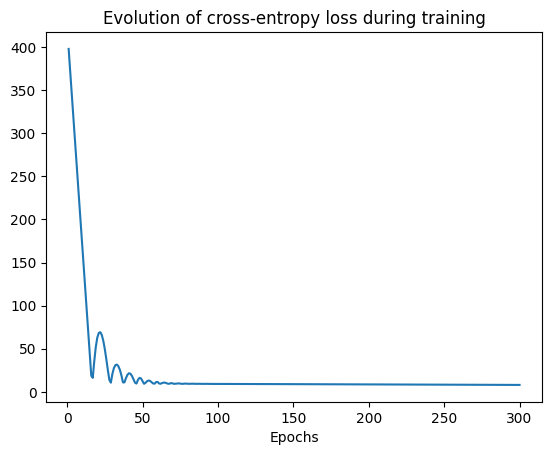

In [10]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tslearn.shapelets import LearningShapelets, grabocka_params_to_shapelet_size_dict
from tslearn.utils import ts_size

# Combinar os dados de treinamento e teste temporariamente para treinar o modelo
X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Get statistics of the dataset
n_ts, ts_sz = X_combined.shape[:2]
n_classes = len(set(y_combined))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.01,
                                                       r=1)

# Define o modelo com parâmetros fornecidos pelos autores
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=549,
                            weight_regularizer=.01,
                            max_iter=300,
                            random_state=1,
                            verbose=0)
shp_clf.fit(X_combined, y_combined)

# Make predictions and calculate accuracy score
pred_labels = shp_clf.predict(X_combined)
print("Correct classification rate:", accuracy_score(y_combined, pred_labels))

# Plot the different discovered shapelets
plt.figure()
for i, sz in enumerate(shapelet_sizes.keys()):
    plt.subplot(len(shapelet_sizes), 1, i + 1)
    plt.title("%d shapelets of size %d" % (shapelet_sizes[sz], sz))
    for shp in shp_clf.shapelets_:
        if ts_size(shp) == sz:
            plt.plot(shp.ravel())
    plt.xlim([0, max(shapelet_sizes.keys()) - 1])

plt.tight_layout()
plt.show()

# The loss history is accessible via the `model_` that is a keras model
plt.figure()
plt.plot(np.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.show()